# CAB420, Week 5 Practical, Question 1 Template
## Fine-Tuning DCNNs. 
The Kuzushiji-MNIST-49 database, or K-MNIST-49, is a MNIST like database, though with a substantially larger number of classes. However while the number of classes and the variety within them is increased over MNIST, the characteristics of the images are largely the same, i.e. the database is made up of 28x28 pixel grey scale images, where pixel values are often close to 0 or 1 (i.e. black or white). Given this, a model trained on MNIST is likely to adapt well when fine-tuned on K-MNIST-49.

Using a model that has been trained on MNIST and the K-MNIST-49 dataset:
* Modify the network to classify 49 classes rather than the original 10;
* Fine-tune the network and assess the model’s performance. Consider how it compares to the models trained from scratch in the previous week's practical.

### Relevant Examples

The sixth DCNN example, ``CAB420_DCNNs_Example_6_Fine_Tuning_and_Data_Augmentation.ipynb`` is a good starting point, and deals with fine-tuning.

The two "Lots of" scripts, ``CAB420_DCNN_Models_Additional_Script_Lots_of_ResNet_Models.ipynb`` and ``CAB420_DCNN_Models_Additional_Script_Lots_of_VGG_Like_Models.ipynb`` produce lots of pre-trained models that you can use. Saved models that result for both of theses scripts are up on blackboard.

### Suggested Packages

Once again it's tensor flow and keras here. sklearn and matplotlib provide some supporting functionality.

In [1]:
import os
# why is this here? This is disabling some tensorflow warning I get in some of my environments that 
# annoy me (look ugly and untidy really)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorboard import notebook
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
# function to compute class weights
from sklearn.utils import compute_class_weight

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.io
import numpy

### Step 1: The Data

KMINIST-49 again, using the same code to load as we've done previously.

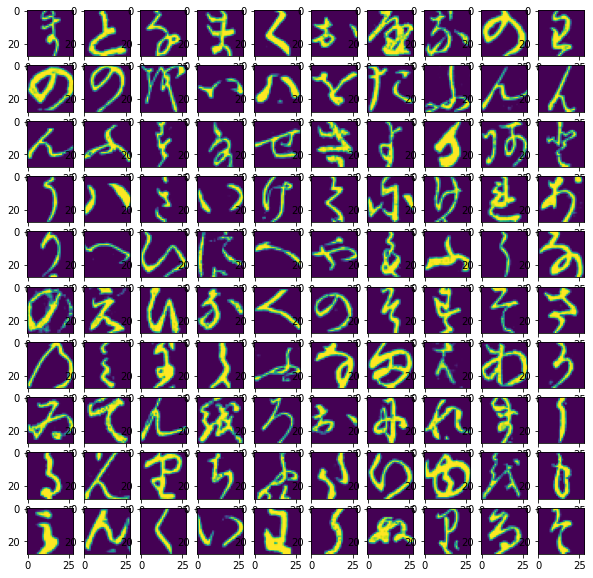

In [2]:
kmnist_train = scipy.io.loadmat('../../data/kmnist/kmnist49_train.mat')
kmnist_test = scipy.io.loadmat('../../data/kmnist/kmnist49_test.mat')
train = numpy.transpose(kmnist_train['imgs'], (2, 0, 1)).reshape(-1, 28, 28, 1)
train_y = to_categorical(kmnist_train['labels'], 49)
test = numpy.transpose(kmnist_test['imgs'], (2, 0, 1)).reshape(-1, 28, 28, 1)
test_y = to_categorical(kmnist_test['labels'], 49)

fig = plt.figure(figsize=[10, 10])
for i in range(100):
    ax = fig.add_subplot(10, 10, i + 1)
    ax.imshow(train[i,:,:,0])
    ax.axis('off')

### Step 2: Fine Tuning

You can tune any model you choose. 

These models all come from the pre-trained set available on blackboard (week 5 additional resources). We recommend a simple network so you don't have to wait too long for things to train, but feel free to play with different networks and see how things vary.

You will need to change the below path to a model of your chosing.

In [3]:
model_vgg = keras.models.load_model('../../trained_models_keras/vgg_2stage_MNIST_small.h5')
model_vgg.summary()

Model: "simple_vgg"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 28, 28, 8)         80        
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 28, 28, 8)         584       
_________________________________________________________________
batch_normalization_17 (Batc (None, 28, 28, 8)         32        
_________________________________________________________________
activation_17 (Activation)   (None, 28, 28, 8)         0         
_________________________________________________________________
spatial_dropout2d_10 (Spatia (None, 28, 28, 8)         0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 8)         0

You could chose to work off either a VGG-Like or ResNet model here. I'd encourage you to try both.

In [ ]:
#model_resnet = keras.models.load_model('../../trained_models_keras/resnet_v1_MNIST_medium.h5')
#model_resnet.summary()

### Step 3: Modify the Network

You now need to swap out the last layer to change the number of outputs for your chosen model. You can optionally set different layers to be fixed - this is a good thing to experiment with.

### Step 4: Network Training and Evaluation

You now need to train the network with the KMNIST data.

An eval function is provided below. This is slightly different from last week, just to mix it up.

In [7]:
def eval_model(model, history, x_train, y_train, x_test, y_test):

    fig = plt.figure(figsize=[20, 20])    

    ax = fig.add_subplot(1, 1, 1)    
    pred = model.predict(x_test);
    indexes = tf.argmax(pred, axis=1)
    gt_idx = tf.argmax(y_test, axis=1)

    confusion_mtx = tf.math.confusion_matrix(gt_idx, indexes) 
    plt.figure(figsize=(10, 8))
    sns.heatmap(confusion_mtx, xticklabels=range(49), yticklabels=range(49), 
            annot=True, fmt='g', ax=ax)

    fig = plt.figure(figsize=[10, 5])    

    ax = fig.add_subplot(1, 1, 1)    
    ax.plot(history['loss'], label='Loss')
    ax.plot(history['val_loss'], label='Validation Loss')
    ax.plot(history['accuracy'], label='Accuracy')
    ax.plot(history['val_accuracy'], label='Validation Accuracy')
    ax.legend()

    print(classification_report(gt_idx, indexes))